In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\hp\OneDrive\glass.xlsx",sheet_name = 'glass')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [9]:
df['Fe'].mean()

0.05700934579439253

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RI', ylabel='Count'>

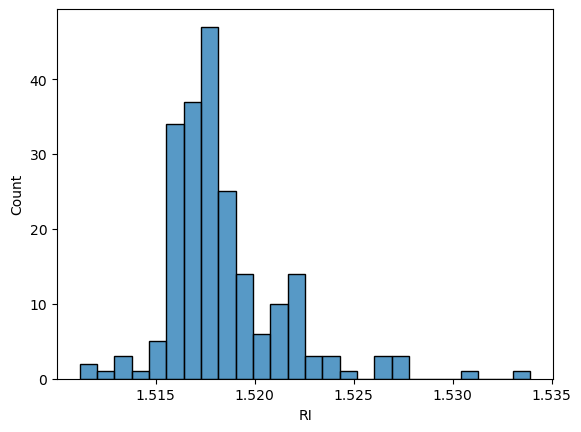

In [10]:
sns.histplot(df['RI'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Na', ylabel='Count'>

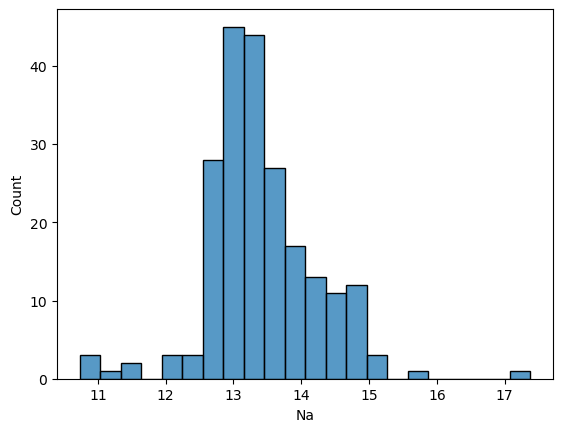

In [11]:
sns.histplot(df['Na'])

In [12]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


feature
type
type vs feature
feature
type
type vs feature
feature
type
type vs feature
feature
type
type vs feature
feature
type
type vs feature
feature
type
type vs feature
feature
type
type vs feature
feature
type
type vs feature
feature
type
type vs feature


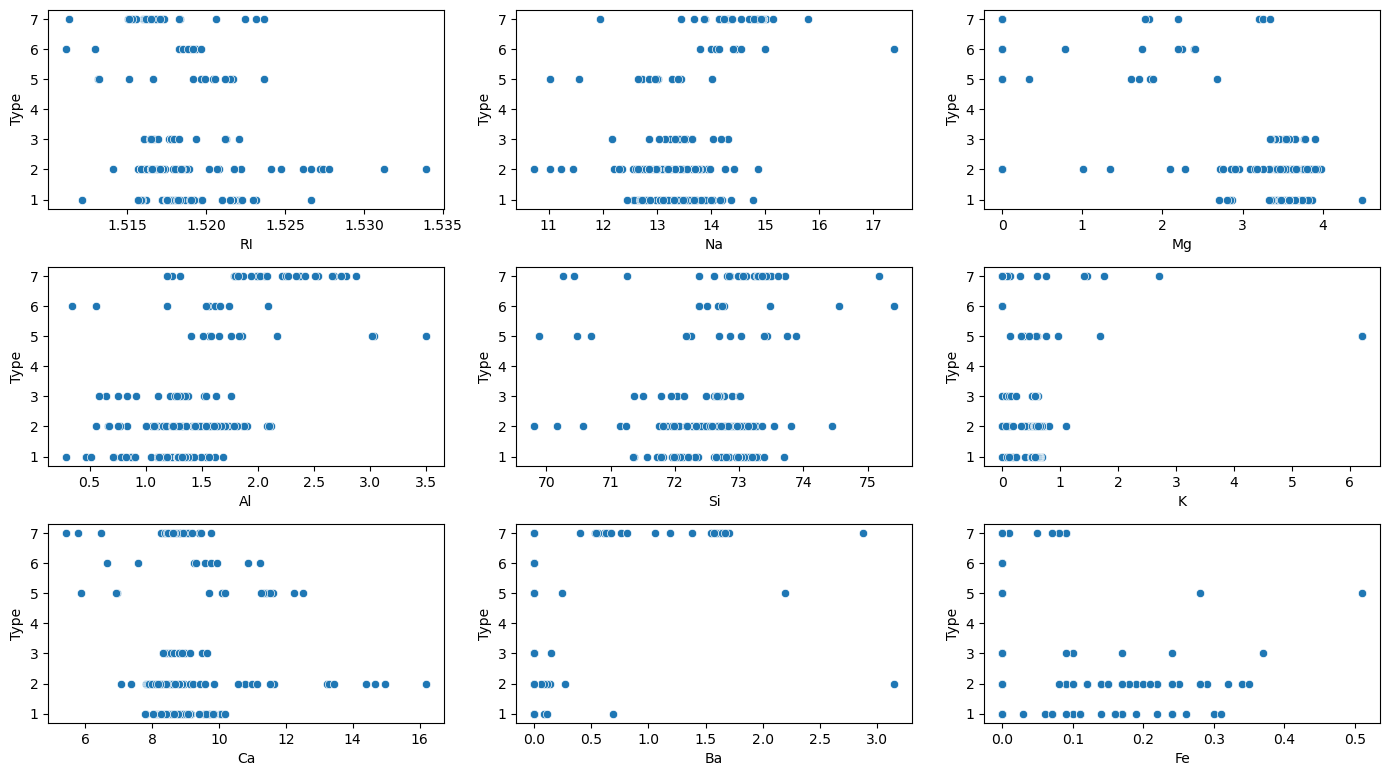

In [17]:
numerical_features = df.select_dtypes(include = ['int64','float64']).columns.drop('Type')
plt.figure(figsize = (14,10))

for i,features in enumerate(numerical_features,1):
    plt.subplot(4,3,i)
    sns.scatterplot(x = df[features],y = df['Type'],)
    plt.xlabel = print('feature')
    plt.ylabel = print('type')
    plt.title = print('type vs feature')

plt.tight_layout()
plt.show()

In [18]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = df.drop('Type',axis =1)
y = df['Type']

# 1. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialing and training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Making predictions on the test data
y_pred = rf_model.predict(X_test)

# 4. Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1-Score: 0.83

Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [20]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging Method
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),  # Using Decision Tree as base estimator
    n_estimators=100,  # Number of trees
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Boosting Method
boosting_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # Shallow tree as base estimator
    n_estimators=100,  # Number of boosting rounds
    random_state=42
)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

# Evaluating Bagging Model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("Bagging Model Performance:")
print(f"Accuracy: {accuracy_bagging:.2f}")
print(f"Precision: {precision_bagging:.2f}")
print(f"Recall: {recall_bagging:.2f}")
print(f"F1-Score: {f1_bagging:.2f}\n")

# Evaluating Boosting Model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

print("Boosting Model Performance:")
print(f"Accuracy: {accuracy_boosting:.2f}")
print(f"Precision: {precision_boosting:.2f}")
print(f"Recall: {recall_boosting:.2f}")
print(f"F1-Score: {f1_boosting:.2f}")

# Comparison 
print("\nComparison Summary:")
print(f"Bagging vs Boosting Accuracy: {accuracy_bagging:.2f} vs {accuracy_boosting:.2f}")
print(f"Bagging vs Boosting Precision: {precision_bagging:.2f} vs {precision_boosting:.2f}")
print(f"Bagging vs Boosting Recall: {recall_bagging:.2f} vs {recall_boosting:.2f}")
print(f"Bagging vs Boosting F1-Score: {f1_bagging:.2f} vs {f1_boosting:.2f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model Performance:
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-Score: 0.85

Boosting Model Performance:
Accuracy: 0.49
Precision: 0.48
Recall: 0.49
F1-Score: 0.43

Comparison Summary:
Bagging vs Boosting Accuracy: 0.86 vs 0.49
Bagging vs Boosting Precision: 0.86 vs 0.48
Bagging vs Boosting Recall: 0.86 vs 0.49
Bagging vs Boosting F1-Score: 0.85 vs 0.43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Interview Questions

In [ ]:
#1. Explain Bagging and Boosting methods. How is it different from each other.

#Bagging (Bootstrap Aggregating)
# Generate random subsets of the original dataset using bootstrapping (sampling with replacement).
#Train a model on each subset independently.
#Combine the predictions

# Boosting
#Train the first model on the full dataset.
#Evaluate errors and assign higher weights to these data points.
#Train the next model on the updated dataset with adjusted weights.
#Repeat for a predefined number of iterations or until convergence.
#Combine predictions using weighted voting or averaging.

In [ ]:
#2. Explain how to handle imbalance in the data.

#Precision-Recall Curve: useful when the focus is on the positive class.
#F1-Score: Balances precision and recall.
#ROC-AUC (Receiver Operating Characteristic - Area Under Curve): Measures the ability to distinguish between classes.
#Confusion Matrix: Analyze the True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).